- Perpare Our Data

Import Packages

In [74]:
import numpy as np
import pandas as pd
import seaborn as sn
import matplotlib.pyplot as plt

Import Data

In [95]:
df = pd.read_csv('Customers.csv')

Get a View on Data

In [77]:
df.head()

,CustomerID,Gender,Age,Annual Income ($),Spending Score (1-100),Profession,Work Experience,Family Size
0,1,Male,19,15000,39,Healthcare,1,4
1,2,Male,21,35000,81,Engineer,3,3
2,3,Female,20,86000,6,Engineer,1,1
3,4,Female,23,59000,77,Lawyer,0,2
4,5,Female,31,38000,40,Entertainment,2,6


In [78]:
df.shape

(2000, 8)

- Data Cleaning

Convert columns names to lower letters

In [135]:
df.columns = df.columns.str.lower()

In [140]:
df['age'].replace(0,10,inplace=True)
df['age'].replace(1,13,inplace=True)
df['age'].replace(2,14,inplace=True)
df['age'].replace(3,15,inplace=True)
df['age'].replace(4,16,inplace=True)
df['age'].replace(5,11,inplace=True)

In [117]:
df.columns

Index(['customerid', 'gender', 'age', 'annual income ($)',
       'spending score (1-100)', 'profession', 'work experience',
       'family size'],
      dtype='object')

<AxesSubplot: >

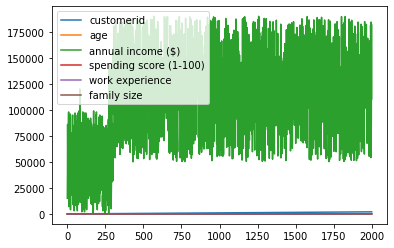

In [119]:
df.plot()

In [87]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2000 entries, 0 to 1999
Data columns (total 8 columns):
 #   Column                  Non-Null Count  Dtype 
---  ------                  --------------  ----- 
 0   customerid              2000 non-null   int64 
 1   gender                  2000 non-null   object
 2   age                     2000 non-null   int64 
 3   annual income ($)       2000 non-null   int64 
 4   spending score (1-100)  2000 non-null   int64 
 5   profession              1965 non-null   object
 6   work experience         2000 non-null   int64 
 7   family size             2000 non-null   int64 
dtypes: int64(6), object(2)
memory usage: 125.1+ KB


Find and Deal with Missing Values

In [88]:
df.isna().sum()

customerid                 0
gender                     0
age                        0
annual income ($)          0
spending score (1-100)     0
profession                35
work experience            0
family size                0
dtype: int64

In [97]:
df['profession'].fillna('Artist',inplace=True)

Find Duplicates

In [99]:
df.duplicated().sum()

0

- Explority Data Analysis (EDA)

In [104]:
# Do not focous on customerid column
df.describe().round(1)

,customerid,age,annual income ($),spending score (1-100),work experience,family size
count,2000.0,2000.0,2000.0,2000.0,2000.0,2000.0
mean,1000.5,49.0,110731.8,51.0,4.1,3.8
std,577.5,28.4,45739.5,27.9,3.9,2.0
min,1.0,0.0,0.0,0.0,0.0,1.0
25%,500.8,25.0,74572.0,28.0,1.0,2.0
50%,1000.5,48.0,110045.0,50.0,3.0,4.0
75%,1500.2,73.0,149092.8,75.0,7.0,5.0
max,2000.0,99.0,189974.0,100.0,17.0,9.0


In [158]:
df.sample(10)

,customerid,gender,age,annual income ($),spending score (1-100),profession,work experience,family size
1266,1267,Female,24,86119,44,Artist,1,6
406,407,Female,51,66852,73,Executive,15,3
863,864,Female,10,141351,10,Engineer,0,2
376,377,Female,30,144043,78,Doctor,1,1
1907,1908,Male,15,142147,78,Artist,8,4
1176,1177,Male,57,50429,23,Artist,0,1
844,845,Female,38,176551,45,Healthcare,8,1
1889,1890,Female,19,134644,96,Executive,1,2
1713,1714,Male,67,86289,96,Artist,1,5
21,22,Male,25,4000,73,Healthcare,3,4


<AxesSubplot: >

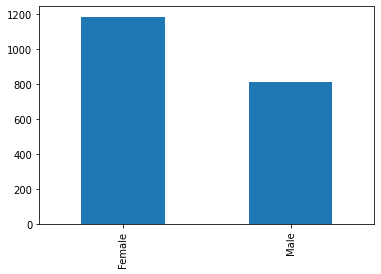

In [161]:
df['gender'].value_counts().plot(kind='bar')

<AxesSubplot: >

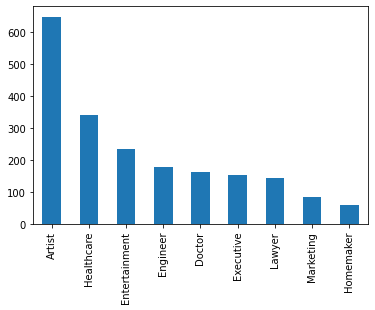

In [163]:
df['profession'].value_counts().plot(kind='bar')

What The Most Gender Get annual income for Bussines

In [110]:
max_income = df['annual income ($)'].max()
df[df['annual income ($)'] == max_income]['gender']

569    Female
Name: gender, dtype: object

What The Most Profession Get annual income for Bussines

In [111]:
max_income = df['annual income ($)'].max()
df[df['annual income ($)'] == max_income]['profession']

569    Engineer
Name: profession, dtype: object

Get annual income by profession

In [164]:
df.pivot_table(index='profession',values='annual income ($)',aggfunc=np.sum).sort_values(by='annual income ($)',ascending=False)

,annual income ($)
profession,
Artist,70674451
Healthcare,38162600
Entertainment,25892178
Engineer,19897862
Doctor,17963288
Executive,17406830
Lawyer,15761409
Marketing,9179508
Homemaker,6525517


<AxesSubplot: xlabel='profession'>

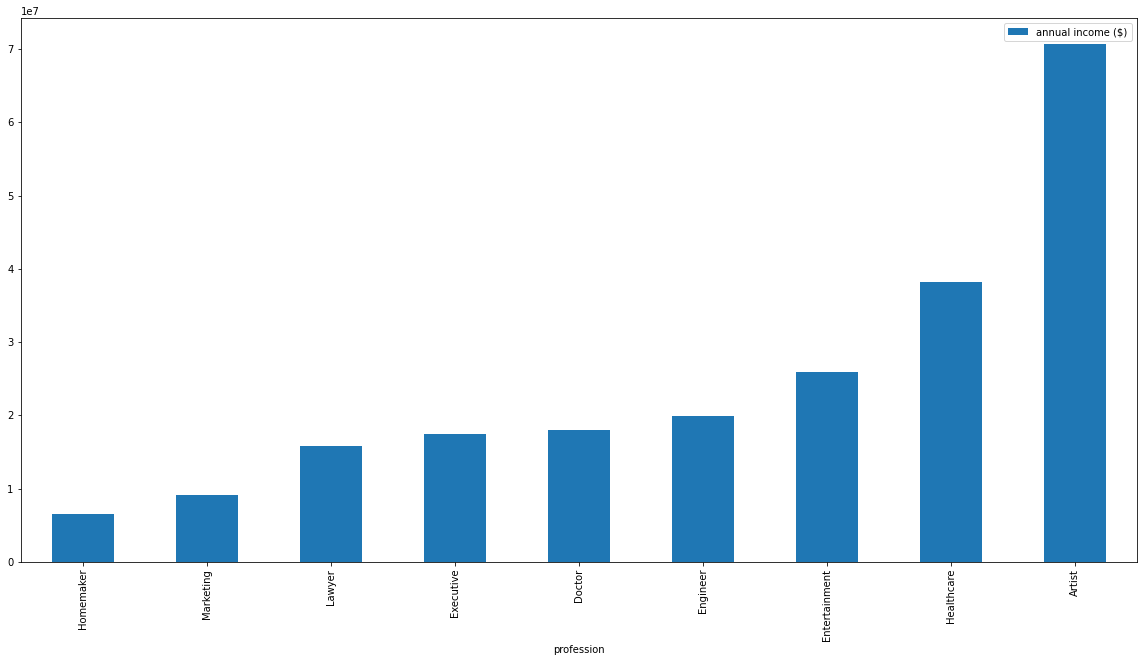

In [151]:
df.pivot_table(index='profession',values='annual income ($)',aggfunc=np.sum).sort_values(by='annual income ($)',ascending=True).plot(kind='bar',figsize=(20,10))

Get income by Gender

In [124]:
df.pivot_table(index='gender',values='annual income ($)',aggfunc=np.sum).sort_values(by='annual income ($)',ascending=True)

,annual income ($)
gender,
Male,90346937
Female,131116706


array([<AxesSubplot: ylabel='annual income ($)'>], dtype=object)

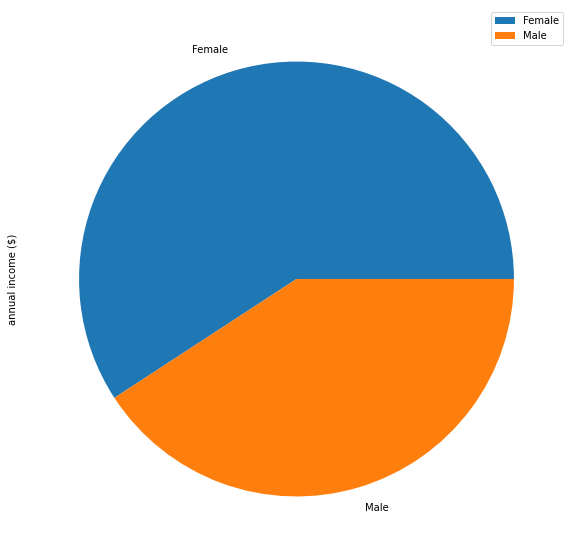

In [150]:
df.pivot_table(index='gender',values='annual income ($)',aggfunc=np.sum).plot(kind='pie',subplots=True,figsize=(20,10))

Get Experince for profession

In [130]:
df.pivot_table(index='profession',values='work experience',aggfunc=np.max).sort_values(by='work experience',ascending=False)

,work experience
profession,
Artist,17
Lawyer,17
Doctor,16
Engineer,16
Executive,16
Healthcare,16
Entertainment,15
Marketing,15
Homemaker,14


Get the oldest and youngest customer data

In [133]:
old_customer = df['age'].max()
df[df['age'] == old_customer]

,customerid,gender,age,annual income ($),spending score (1-100),profession,work experience,family size
347,348,Female,99,184426,41,Artist,9,1
351,352,Male,99,173394,4,Engineer,13,1
361,362,Male,99,63364,61,Entertainment,1,2
546,547,Male,99,164781,83,Engineer,0,2
567,568,Female,99,172896,13,Engineer,0,3
937,938,Female,99,56851,72,Entertainment,6,3
1016,1017,Female,99,55972,83,Entertainment,1,7
1019,1020,Female,99,145777,94,Executive,1,5
1103,1104,Female,99,103706,50,Entertainment,1,2
1133,1134,Female,99,57677,99,Lawyer,0,5


Get most profession has spending score

In [142]:
df.pivot_table(index='profession',values='spending score (1-100)',aggfunc=np.sum).sort_values(by='spending score (1-100)',ascending=False)

,spending score (1-100)
profession,
Artist,33794
Healthcare,17125
Entertainment,12388
Engineer,8765
Doctor,8356
Executive,7635
Lawyer,6938
Marketing,4141
Homemaker,2783


<AxesSubplot: xlabel='profession'>

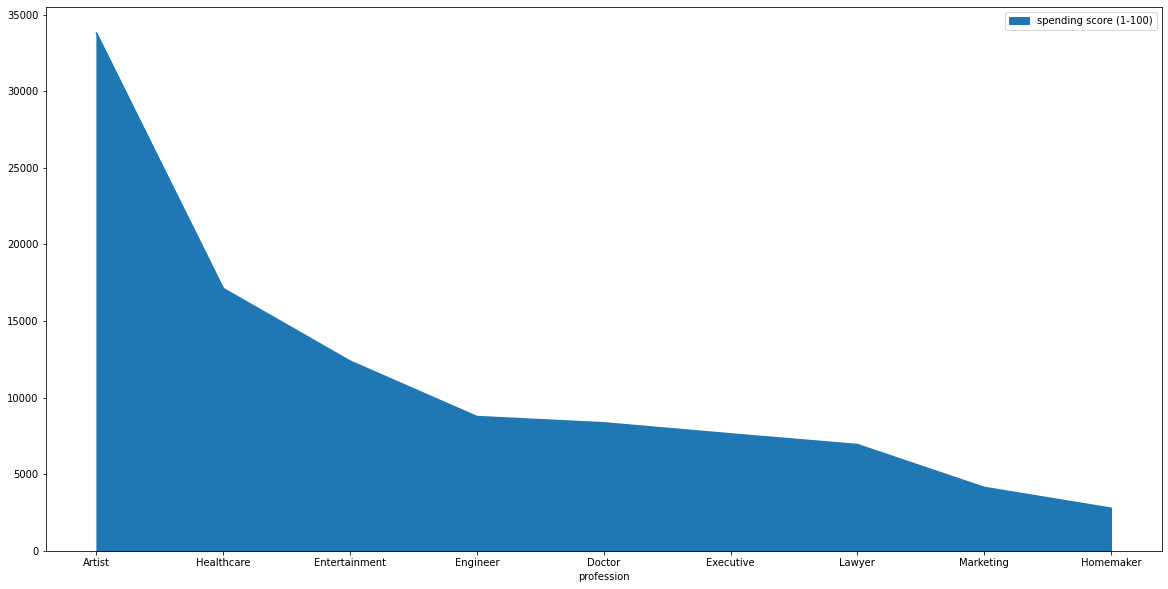

In [149]:
df.pivot_table(index='profession',values='spending score (1-100)',aggfunc=np.sum).sort_values(by='spending score (1-100)',ascending=False).plot(kind='area',figsize=(20,10))

Get most Gender has spending score

In [152]:
df.pivot_table(index='gender',values='spending score (1-100)',aggfunc=np.sum).sort_values(by='spending score (1-100)',ascending=True)

,spending score (1-100)
gender,
Male,41469
Female,60456


array([<AxesSubplot: ylabel='spending score (1-100)'>], dtype=object)

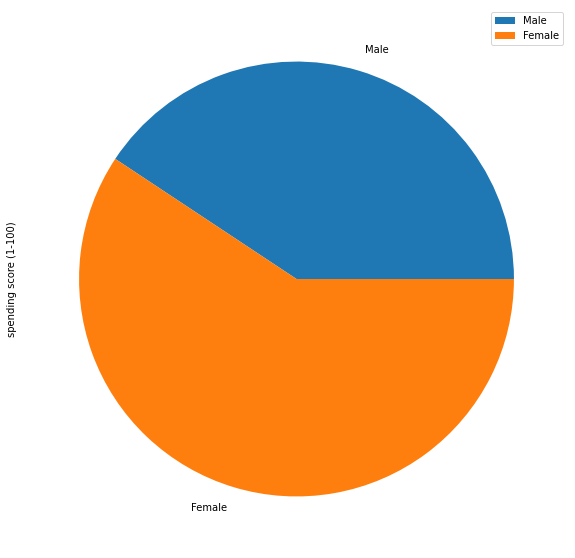

In [157]:
df.pivot_table(index='gender',values='spending score (1-100)',aggfunc=np.sum).sort_values(by='spending score (1-100)',ascending=True).plot(kind='pie',subplots=True,figsize=(20,10))


Get groups by gender and profession depend on family size

In [180]:
df.groupby('gender').max()['family size']

gender
Female    8
Male      9
Name: family size, dtype: int64

In [181]:
df.groupby('profession').max()['family size']

profession
Artist           8
Doctor           7
Engineer         8
Entertainment    7
Executive        7
Healthcare       8
Homemaker        7
Lawyer           9
Marketing        7
Name: family size, dtype: int64

<AxesSubplot: xlabel='profession'>

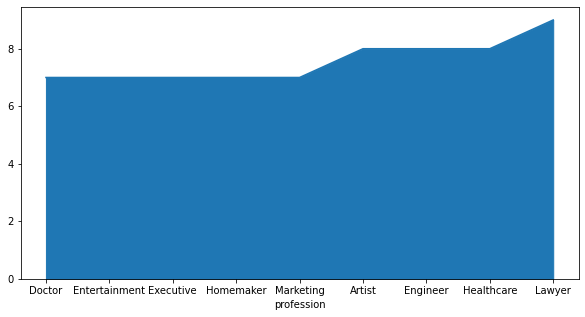

In [188]:
df.groupby('profession').max()['family size'].sort_values().plot(kind='area',figsize=(10,5))

Get the Co_relation 

In [175]:
df.corr()

C:\Users\AS\AppData\Local\Temp\ipykernel_14384\1134722465.py:1: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  df.corr()


,customerid,age,annual income ($),spending score (1-100),work experience,family size
customerid,1.000000,0.077221,0.328400,0.018936,0.091574,0.159655
age,0.077221,1.000000,0.025194,-0.040640,-0.014831,0.039464
annual income ($),0.328400,0.025194,1.000000,0.023299,0.089136,0.093005
spending score (1-100),0.018936,-0.040640,0.023299,1.000000,-0.028948,0.002232
work experience,0.091574,-0.014831,0.089136,-0.028948,1.000000,0.011873
family size,0.159655,0.039464,0.093005,0.002232,0.011873,1.000000


- Save our Final Data

In [189]:
df.to_excel('final_cutomers.xlsx')

- Visualize Data in Power BI